In [3]:
from google.colab import files

print("📁 Upload sign_mnist_train.csv and sign_mnist_test.csv")
uploaded = files.upload()

📁 Upload sign_mnist_train.csv and sign_mnist_test.csv


Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [1]:
!pip install -U tensorflow


In [2]:
# ✅ STEP 2: Load and Preprocess the Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# load the dataset
# These files contain hand sign images as flattened pixel values and a label column
# label = class (0–24) representing letters A–Y (except J)

train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

# split into features (X) and labels(Y)
X_train = train_df.drop('label' , axis=1).values # 2D array of image pixels (shape : [num_sample , 784])
y_train = train_df['label'].values # labels corresponding to each image (e.g., 0 = A , 1 = B, .... , 24 = Y)

X_test = test_df.drop('label' , axis = 1).values
y_test = test_df['label'].values

# normailize and reshape the image data
X_train = X_train.reshape(-1, 28, 28 , 1) / 255.0 # reshape (-1,28,28,1)/255.0 converts flat 784 pixels to 28*28 grayscale images with 1 color channel
X_test = X_test.reshape(-1, 28, 28 , 1) / 255.0 # /255 normalize the pixel value from [0,255] -> [0,1] for better training

# one-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test) # like for C it is going to be --> [0,0,1,0,0....]


In [3]:
print("numpy" , np.__version__)
print("pandas" , pd.__version__)
print("tensorflow" , tf.__version__)


numpy 2.0.2
pandas 2.2.2
tensorflow 2.19.0


In [9]:
!python --version


Python 3.11.13


In [4]:
# ✅ STEP 3: Build CNN Model
from tensorflow.keras.models import Sequential # let us stack the layers one after another
# Conv2D --> Performs Convolution (features detection)
# MaxPooling2D --> Downsamples (reduces image size)
# Flatten --> Converts 2D features to 1D vector
# Dense --> Fully connected layer
# Dropout --> Prevents overfitting
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# defining the model
# layer-by-layer CNN using Sequential
model = Sequential([
    # Layer 1 : Convolution + ReLU
    Conv2D(32 , (3,3) , activation='relu' , input_shape=(28,28,1)), # 32 filters on size 3*3 , relu adds the non-linearity , input_shape -> 28*28 grayscale image (1 channel)
    # Layer 2 : Max Pooling
    MaxPooling2D(2,2) , # reduces spatial dimensions from 28*28 to 14*14
    # Layer 3 : Another Conv Layer
    Conv2D(64 , (3,3), activation='relu'),
    # Layer 4 : Max Pooling Again
    MaxPooling2D(2,2), #reduces the 14*14 into 7*7
    # Layer 5 : Flatten
    Flatten(), # Converts 7*7*64 feature maps into a 1D vector: 7*7*64 = 3136 , prepares data for the dense (fully connected) layers
    # Layer 6 : Dense (Fully Connected)
    Dense(128 , activation = 'relu'), # 128 neurons
    # Layer 7 : Dropout
    Dropout(0.5), # drops the 50% nuerons randomly during training , prevent overfitting
    # Layer 8 : Output Layer
    Dense(25 , activation='softmax') # 25 nuerons one for each class from A to Y - J , softmax -> converts the output into probablities
])

# compile the model
# adam -> Efficient optimizer
# categorical_crossentropy -> used for multiclass classification with one-hot encoded labels
# metrices = ['accuracy'] -> track accuracy during the training
model.compile(optimizer='adam' , loss='categorical_crossentropy', metrics = ['accuracy'])


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,969 (886.60 KB)

 Trainable params: 226,969 (886.60 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# ✅ STEP 4: Train the Model

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.2561 - loss: 2.4832 - val_accuracy: 0.7999 - val_loss: 0.6853
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 39s 65ms/step - accuracy: 0.7644 - loss: 0.6919 - val_accuracy: 0.8684 - val_loss: 0.3938
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.8675 - loss: 0.3872 - val_accuracy: 0.9002 - val_loss: 0.2981
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - accuracy: 0.9124 - loss: 0.2500 - val_accuracy: 0.9221 - val_loss: 0.2349
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.9403 - loss: 0.1776 - val_accuracy: 0.9356 - val_loss: 0.1961
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 28s 65ms/step - accuracy: 0.9542 - loss: 0.1344 - val_accuracy: 0.9378 - val_loss: 0.1898
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9622 - loss: 0.1078 - val_accuracy: 0.9399 - val_loss: 0.2102
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9668 - loss: 0.0945 - 

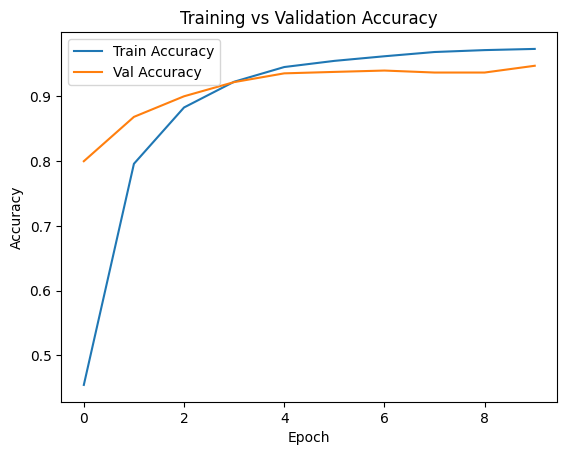

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [ ]:
# ✅ STEP 5: Evaluate the Model

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test accuracy: {test_acc:.2f}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9151 - loss: 0.3810
✅ Test accuracy: 0.92


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


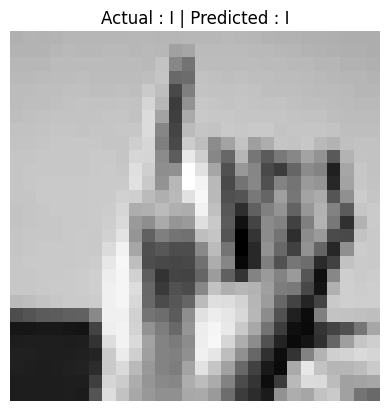

In [7]:
# ✅ STEP 6: Predict from a Test Image

def plot_prediction(index):
  image = X_test[index].reshape(28,28)
  label = np.argmax(y_test[index]) # np.argmax gets the index of the 1 in one-hot encoded vector which is our actual label

  # reshape -> image for prediction
  # predict -> return a vector of probabilites of shape (1,25)
  # argmax -> finds the index with the highest probability -> predicted label
  prediction = np.argmax(model.predict(X_test[index].reshape(1,28,28,1)))

  # plt.title(f"Actual: {chr(label+65)} | Predicted: {chr(prediction+65)}")

  # cuz we are skipping the J
  labels_map = [chr(i) for i in range(65,91) if i != 74] # A-Z excluding J

  plt.imshow(image, cmap='gray')

  plt.title(f"Actual : {labels_map[label]} | Predicted : {labels_map[prediction]}")
  plt.axis('off')
  plt.show()

plot_prediction(100)


In [8]:
# save the model
model.save("asl_model.keras")


In [ ]:
# download the model

from google.colab import files
files.download("asl_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ✅ 2. Load and Predict from a Custom Image

from google.colab import files
uploaded = files.upload()
img_path = next(iter(uploaded))




Saving A.jpg to A.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted character: G


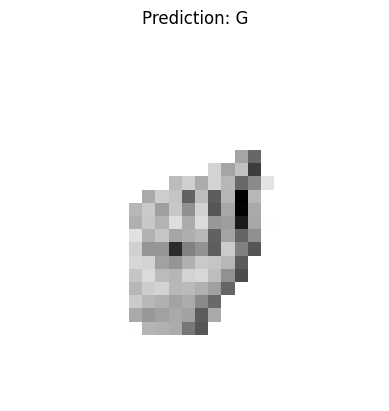

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load model
model = load_model('asl_model.h5')

# Load and preprocess image
img_path = '/content/A.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28, 28))
normalized = resized / 255.0
reshaped = normalized.reshape(1, 28, 28, 1)

# Predict
pred = np.argmax(model.predict(reshaped))

# Map index to character (excluding J)
labels_map = [chr(i) for i in range(65, 91) if i != 74]
print(f"Predicted character: {labels_map[pred]}")

# Visualize
plt.imshow(resized, cmap='gray')
plt.title(f"Prediction: {labels_map[pred]}")
plt.axis('off')
plt.show()
